# importing Libraries




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
dataset= pd.read_csv('train.csv')


In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# I prefer to drop some useless data 

In [4]:
df= dataset.drop(['Cabin','Ticket','PassengerId','Name'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [6]:
df['Sex']=df['Sex'].map({'male':0,'female':1}).astype(int)


In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [8]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df['Embarked']=df['Embarked'].fillna(df.Embarked.mode(dropna=True)[0])

In [10]:
df['Embarked']=df['Embarked'].map({'S':2,'C':2,'Q':3})

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [12]:
for i in range(0,2):
    for j in range(1,4):     
         guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j)]['Age'].dropna().mean()
         df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j),'Age'] = guess_df

In [13]:
X_train = df.drop(['Survived'],axis = 1)

In [14]:
y_train = df.Survived

# Scale data 

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

# Splitting Data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X_train,y_train,test_size = 0.2, random_state = 42) 
train_scores = []
test_scores = []

# Logistic Regression Model

train_score classifier 0.8019662921348315
test_score classifier 0.8212290502793296
[[92 13]
 [19 55]]


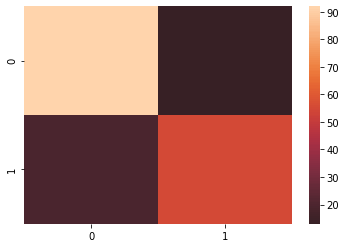

In [17]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0,C=1.0,max_iter=200)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#calculate the details Logistic Regression
print('train_score classifier',classifier.score(X_train,y_train))
print('test_score classifier',classifier.score(X_test,y_test))

train_scores.append(classifier.score(X_train,y_train))
test_scores.append(classifier.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()


# Support Vector Machines (SVM)

train_score svcmodel 0.848314606741573
test_score svcmodel 0.8044692737430168
[[94 11]
 [24 50]]


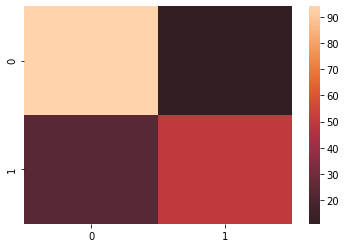

In [18]:
from sklearn.svm import SVC
svcmodel = SVC(kernel='rbf',degree=3)
svcmodel.fit(X_train,y_train)

# Predicting the Test set results SVM
y_pred = svcmodel.predict(X_test)

#calculate the details SVM
print('train_score svcmodel', svcmodel.score(X_train,y_train))
print('test_score svcmodel',svcmodel.score(X_test,y_test))

train_scores.append(svcmodel.score(X_train,y_train))
test_scores.append(svcmodel.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()


# KNN

train_score Knnclassifier_model 0.7780898876404494
test_score Knnclassifier_model 0.7486033519553073
[[89 16]
 [29 45]]


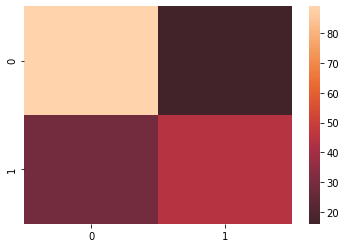

In [19]:
from sklearn.neighbors import KNeighborsClassifier
Knnclassifier_model = KNeighborsClassifier(n_neighbors=100 )
Knnclassifier_model.fit(X_train,y_train)

# Predicting the Test set results KNeighborsClassifier
y_pred = Knnclassifier_model.predict(X_test)

#calculate the details KNeighborsClassifier
print('train_score Knnclassifier_model', Knnclassifier_model.score(X_train,y_train))
print('test_score Knnclassifier_model',Knnclassifier_model.score(X_test,y_test))

train_scores.append(Knnclassifier_model.score(X_train,y_train))
test_scores.append(Knnclassifier_model.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()

# Naive Bayes

train_score gussian_model 0.7991573033707865
test_score gussian_model 0.770949720670391
[[85 20]
 [21 53]]


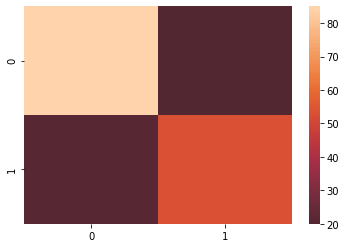

In [20]:
from sklearn.naive_bayes import GaussianNB
gussian_model = GaussianNB(priors=None, var_smoothing=1e-09)
gussian_model.fit(X_train,y_train)

# Predicting the Test set results Naive Bayes
y_pred = gussian_model.predict(X_test)

#calculate the details Naive Bayes
print('train_score gussian_model', gussian_model.score(X_train,y_train))
print('test_score gussian_model',gussian_model.score(X_test,y_test))

train_scores.append(gussian_model.score(X_train,y_train))
test_scores.append(gussian_model.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()

# DecisionTreeClassifier

train_score DT_model 0.9803370786516854
test_score DT_model 0.7821229050279329
[[83 22]
 [17 57]]


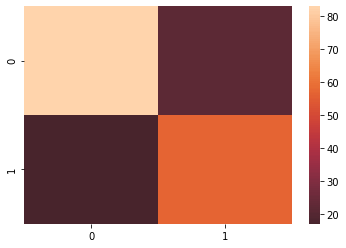

In [21]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier(criterion='entropy')
DT_model.fit(X_train,y_train)

# Predicting the Test set results DecisionTreeClassifier Model
y_pred = DT_model.predict(X_test)

#calculate the details DecisionTreeClassifier Model
print('train_score DT_model', DT_model.score(X_train,y_train))
print('test_score DT_model',DT_model.score(X_test,y_test))

train_scores.append(DT_model.score(X_train,y_train))
test_scores.append(DT_model.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()

# NNClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


train_score mlp_model 0.848314606741573
test_score mlp_model 0.8156424581005587
[[96  9]
 [24 50]]


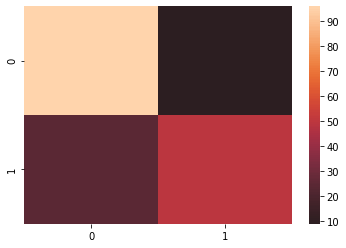

In [22]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=100 ,activation='relu',alpha=0.01,epsilon=1E-08)
mlp_model.fit(X_train,y_train)

# Predicting the Test set results NNClassifier Model
y_pred = mlp_model.predict(X_test)

#calculate the details NNClassifier Model
print('train_score mlp_model', mlp_model.score(X_train,y_train))
print('test_score mlp_model',mlp_model.score(X_test,y_test))

train_scores.append(mlp_model.score(X_train,y_train))
test_scores.append(mlp_model.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()

# RandomForestClassifier

train_score rfc 0.8412921348314607
test_score rfc 0.8044692737430168
[[94 11]
 [24 50]]


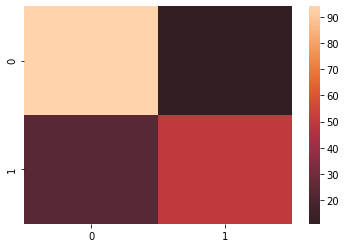

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(criterion='gini',n_estimators=200,max_depth=3)
rfc.fit(X_train,y_train)

# Predicting the Test set results RandomForestClassifier Model
y_pred = rfc.predict(X_test)

#calculate the details RandomForestClassifier Model
print('train_score rfc', rfc.score(X_train,y_train))
print('test_score rfc',rfc.score(X_test,y_test))

train_scores.append(rfc.score(X_train,y_train))
test_scores.append(rfc.score(X_test,y_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

# drawing confusion matrix
sns.heatmap(cm,center=True)
plt.show()

# visualization

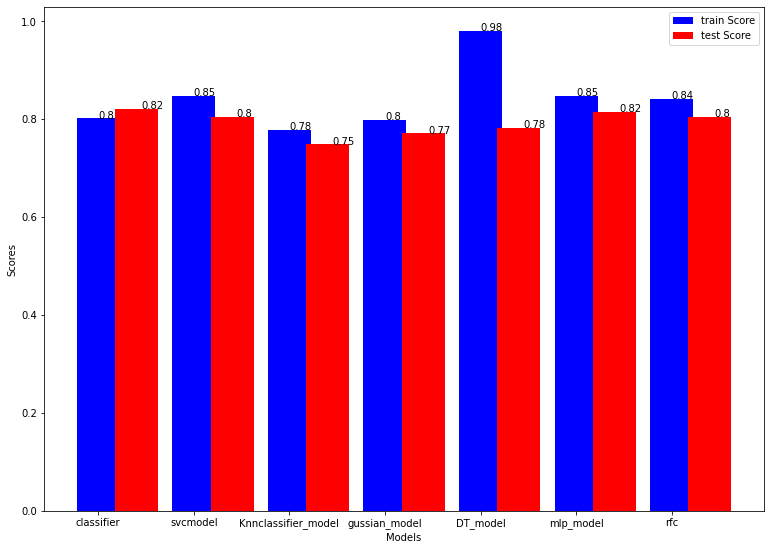

In [24]:
Labels = ['classifier', 'svcmodel', 'Knnclassifier_model', 'gussian_model','DT_model','mlp_model','rfc']
X = np.arange(1,8)
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
plt.style.context('ggplot')
ax.bar(X + 0.00, train_scores, color = 'b', width = 0.45,label = 'train Score')
ax.bar(X + 0.40, test_scores, color = 'r', width = 0.45,label = 'test Score')
for i,m in list(zip(X,train_scores)):
  plt.text(x = i ,y = m,s = float("{:.2f}".format(m)))
for i,m in list(zip(X,test_scores)):
  plt.text(x = i + 0.45 ,y = m,s = float("{:.2f}".format(m)))
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_xticks(X)
ax.set_xticklabels(Labels)
plt.legend()